# Practice Project - 2
Medical Cost Personal Insurance Datasets

Problem Statement:
    
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            

·         age: age of primary beneficiary

·         sex: insurance contractor gender, female, male

·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

·       children: Number of children covered by health insurance / Number of dependents

·     smoker: Smoking

·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

·     charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

Downlaod Files:
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [7]:
df.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [8]:
df.charges.unique

<bound method Series.unique of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [9]:
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<BarContainer object of 1338 artists>

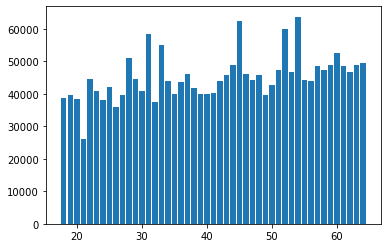

In [11]:
import matplotlib.pyplot as plt
plt.bar(df.age,df.charges)

<BarContainer object of 1338 artists>

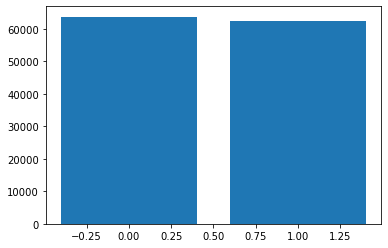

In [12]:
plt.bar(df.sex,df.charges)

<BarContainer object of 1338 artists>

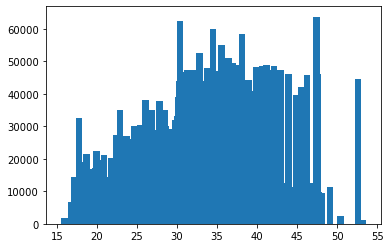

In [13]:
plt.bar(df.bmi,df.charges)

<BarContainer object of 1338 artists>

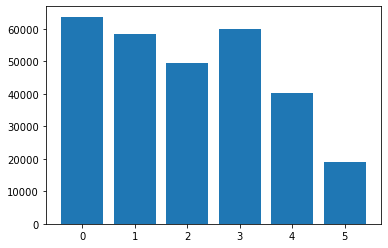

In [14]:
plt.bar(df.children,df.charges)

<BarContainer object of 1338 artists>

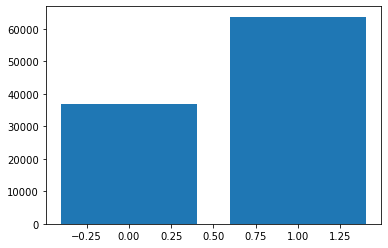

In [15]:
plt.bar(df.smoker,df.charges)

<BarContainer object of 1338 artists>

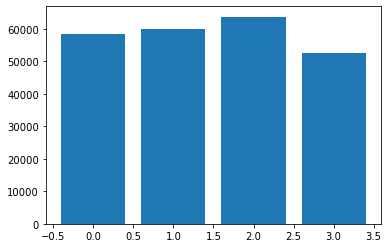

In [16]:
plt.bar(df.region,df.charges)

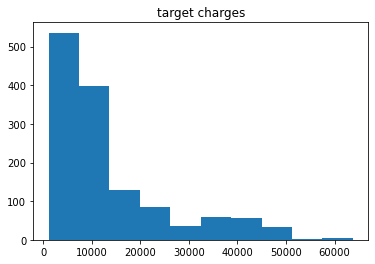

In [17]:
df['charges'].hist(grid=False)
plt.title('target charges')
plt.show()

<AxesSubplot:xlabel='charges', ylabel='count'>

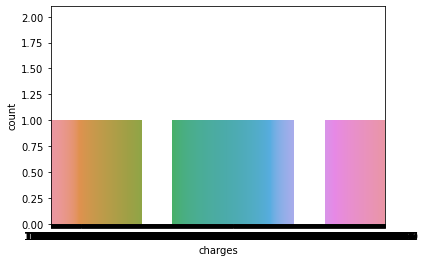

In [18]:
import seaborn as sns
sns.countplot(df.charges)

In [19]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [20]:
df['charges'].value_counts(normalize=True)*100

1639.56310     0.149477
16884.92400    0.074738
29330.98315    0.074738
2221.56445     0.074738
19798.05455    0.074738
                 ...   
7345.08400     0.074738
26109.32905    0.074738
28287.89766    0.074738
1149.39590     0.074738
29141.36030    0.074738
Name: charges, Length: 1337, dtype: float64

In [21]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [22]:
df.shape

(1338, 7)

<AxesSubplot:>

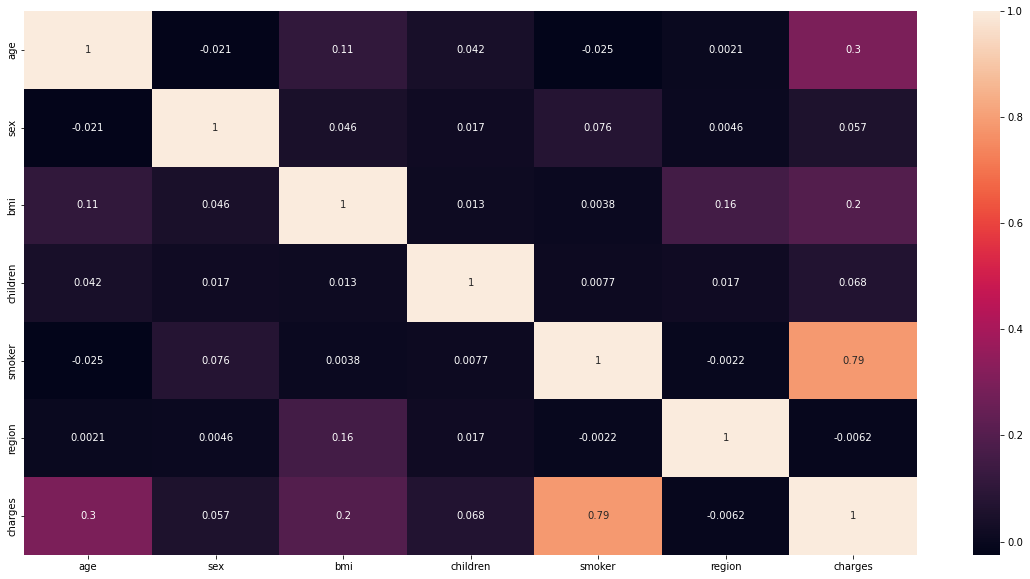

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,color='r')

In [24]:
corr=df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [25]:
# max correlation = smoker
# min correlation = region 
df=df.drop('region',axis=1)

In [26]:
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [27]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [29]:
df.describe().shape

(8, 6)

<AxesSubplot:>

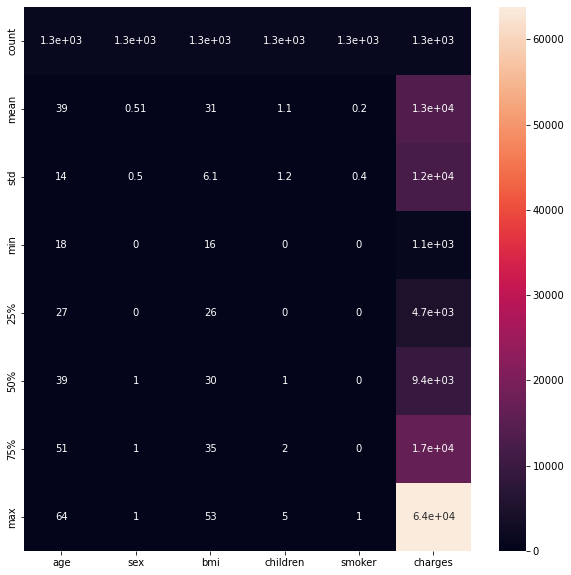

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe(),annot=True)

In [31]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 52.4 KB


In [33]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
charges     1.515880
dtype: float64

In [34]:
from scipy.stats import zscore
zscore=np.abs(zscore(df))
zscore

,age,sex,bmi,children,smoker,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.776802
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,0.930362


In [35]:
newdf=df[(zscore<3).all(axis=1)]
newdf

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [36]:
newdf

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [37]:
x=newdf.iloc[:,0:-1]
y=newdf['charges']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x.shape

(1309, 5)

In [40]:
y.shape

(1309,)

In [41]:
data_loss=((1338-1309)/1338)*100
data_loss

2.167414050822123

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=r2_score(y_test,predlr)
    print('score: ' ,score*100,'at random_state= ' ,i)

score:  78.78300678084379 at random_state=  0
score:  75.66793059032753 at random_state=  1
score:  71.37803879694154 at random_state=  2
score:  74.29741575110968 at random_state=  3
score:  73.48463120879494 at random_state=  4
score:  74.40316741656383 at random_state=  5
score:  76.57265285712414 at random_state=  6
score:  72.40938565849959 at random_state=  7
score:  73.33931476383874 at random_state=  8
score:  78.13980325481138 at random_state=  9
score:  78.36040598408707 at random_state=  10
score:  75.00958475646155 at random_state=  11
score:  76.89017753180887 at random_state=  12
score:  75.43579496110095 at random_state=  13
score:  73.38303309235425 at random_state=  14
score:  75.56849362185122 at random_state=  15
score:  72.30748049525901 at random_state=  16
score:  67.96332562893316 at random_state=  17
score:  72.75974993981583 at random_state=  18
score:  76.98789859205725 at random_state=  19
score:  72.94628410619698 at random_state=  20
score:  73.548416580913

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=370)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print((r2_score(y_test,predlr))*100)

82.6151781801355


In [44]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [45]:
l=Lasso()
l.fit(x_train,y_train)

Lasso()

In [46]:
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [47]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [48]:
model=[l,r,en]
for i in model:
    alpha=[0.0001,0.001,0.01,0.1,1]
    for j in alpha:
        predmodel=i.predict(x_test)
        print('R2_score: ', (r2_score(y_test,predmodel))*100,'at model: ' ,i ,'with alpha= ', j)   
    

R2_score:  82.61166402108945 at model:  Lasso() with alpha=  0.0001
R2_score:  82.61166402108945 at model:  Lasso() with alpha=  0.001
R2_score:  82.61166402108945 at model:  Lasso() with alpha=  0.01
R2_score:  82.61166402108945 at model:  Lasso() with alpha=  0.1
R2_score:  82.61166402108945 at model:  Lasso() with alpha=  1
R2_score:  82.52679614411885 at model:  Ridge() with alpha=  0.0001
R2_score:  82.52679614411885 at model:  Ridge() with alpha=  0.001
R2_score:  82.52679614411885 at model:  Ridge() with alpha=  0.01
R2_score:  82.52679614411885 at model:  Ridge() with alpha=  0.1
R2_score:  82.52679614411885 at model:  Ridge() with alpha=  1
R2_score:  40.15268070308977 at model:  ElasticNet() with alpha=  0.0001
R2_score:  40.15268070308977 at model:  ElasticNet() with alpha=  0.001
R2_score:  40.15268070308977 at model:  ElasticNet() with alpha=  0.01
R2_score:  40.15268070308977 at model:  ElasticNet() with alpha=  0.1
R2_score:  40.15268070308977 at model:  ElasticNet() wit

In [49]:
l=Lasso(alpha=1)
l.fit(x_train,y_train)
predl=l.predict(x_test)
print('R2_score: ' ,(r2_score(y_test,predl))*100)

R2_score:  82.61166402108945


In [50]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)

ExtraTreesRegressor()

In [55]:
models=[knr,gbr,rfr,svr,dtr,abr,etr]
for i in models:
    predmodel=i.predict(x_test)
    print('R2_score of model: ' , i , 'is= ' , (r2_score(y_test,predmodel))*100)


R2_score of model:  KNeighborsRegressor() is=  18.060180035223784
R2_score of model:  GradientBoostingRegressor() is=  91.60129745659506
R2_score of model:  RandomForestRegressor() is=  88.82296713490567
R2_score of model:  SVR() is=  -12.938107019824873
R2_score of model:  DecisionTreeRegressor() is=  80.20390979107425
R2_score of model:  AdaBoostRegressor() is=  86.36982430339741
R2_score of model:  ExtraTreesRegressor() is=  86.78910912142464


In [56]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,150,200]}
gscv=GridSearchCV(estimator=gbr,param_grid=parameters)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [100, 150, 200]})

In [57]:
predgscv=gscv.predict(x_test)
print('Best r2 score of Model:GradientBoostingRegressor is ' , (r2_score(y_test,predgscv))*100)

Best r2 score of Model:GradientBoostingRegressor is  91.60129745659506


In [58]:
print(gscv.best_estimator_)

GradientBoostingRegressor()


In [59]:
import pickle

In [60]:
filename='medical_cost_insurance.pkl'
pickle.dump(gscv.best_estimator_,open(filename,'wb'))

In [61]:
newfile=pickle.load(open(filename,'rb'))
newfile

GradientBoostingRegressor()